<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/DAP_Final_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Analysis

## Importing Tools

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Loading the Dataset

In [71]:
file_path = "/content/airline_passenger_satisfaction.csv"
df_original = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [72]:
print("\nDataset Info:")
df_original.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking       

In [73]:
print("\nSummary Statistics:")
df_original.describe()


Summary Statistics:


,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [74]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

<ipython-input-75-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


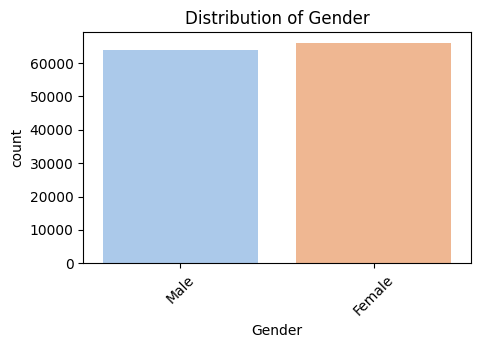

<ipython-input-75-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


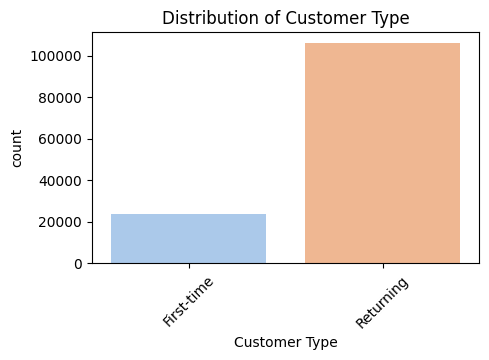

<ipython-input-75-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


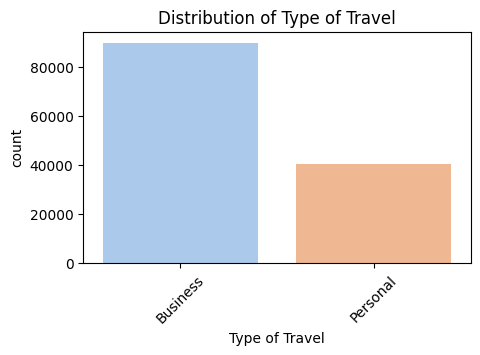

<ipython-input-75-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


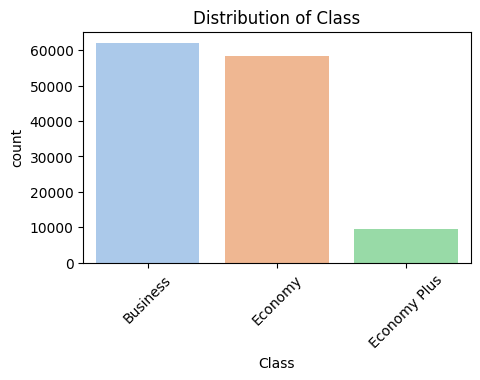

<ipython-input-75-90daefe21240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x=col, palette="pastel")


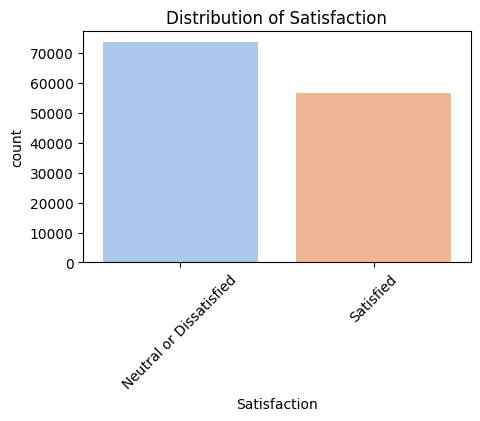

In [75]:
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df_original, x=col, palette="pastel")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

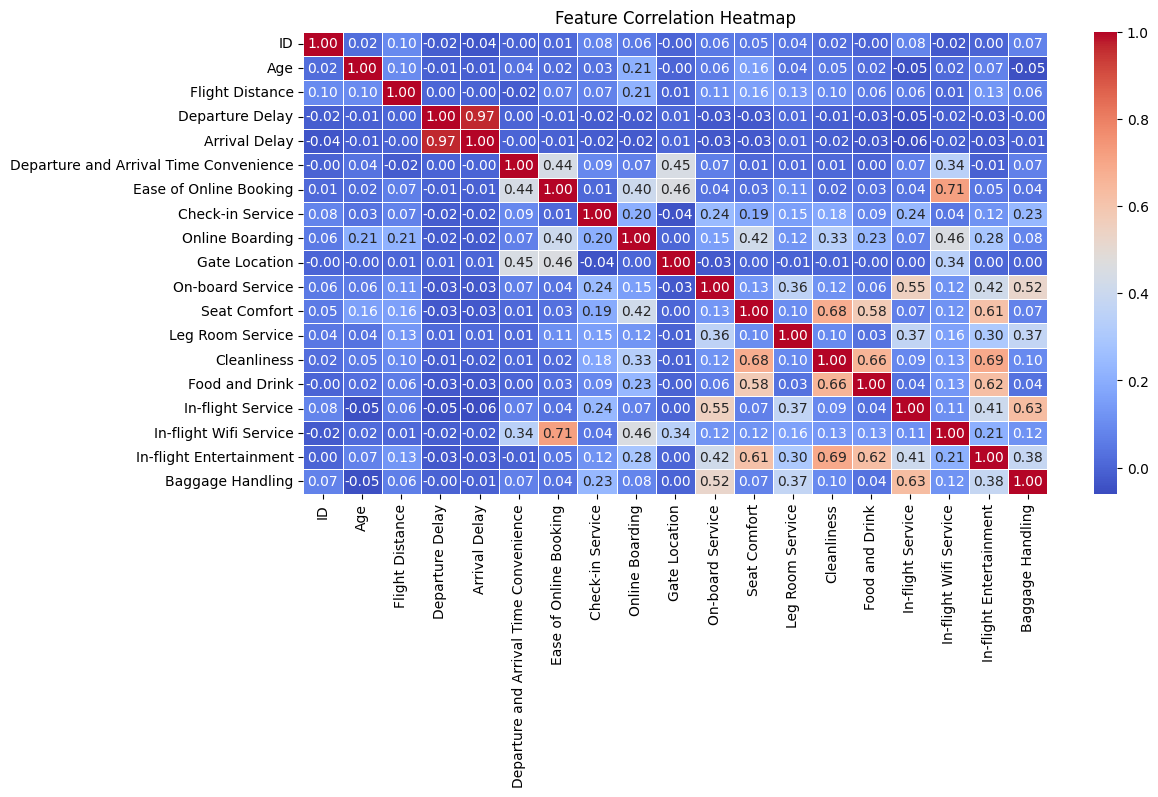

In [76]:
# Before the heatmap code:
numerical_cols = df_original.select_dtypes(include=np.number).columns.tolist()

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_original[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Cleaning the Data

In [77]:
df_original.drop(columns=["ID"], inplace=True)  # 'ID' is not useful for modeling
df_original.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [78]:
df_original["Arrival Delay"].fillna(df_original["Arrival Delay"].median(), inplace=True)
df_original.describe()

<ipython-input-78-31b779c1b6e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original["Arrival Delay"].fillna(df_original["Arrival Delay"].median(), inplace=True)


,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [79]:
print("\nMissing Values:")
print(df_original.isnull().sum())


Missing Values:
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction   

In [80]:
# Select categorical columns
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "Satisfaction"]

# Create a dictionary to store mappings
encoding_mappings = []

# Apply Label Encoding
label_encoders = {}
df_encoded = df_original.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  # Convert categorical to numerical
    label_encoders[col] = le  # Store encoder for reference

    # Store mappings
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        encoding_mappings.append([col, category, encoded_value])

# Create a DataFrame to display mappings
encoding_summary_df = pd.DataFrame(encoding_mappings, columns=["Column Name", "Category", "Encoded Value"])

# Display result
print(encoding_summary_df)


       Column Name                 Category  Encoded Value
0           Gender                   Female              0
1           Gender                     Male              1
2    Customer Type               First-time              0
3    Customer Type                Returning              1
4   Type of Travel                 Business              0
5   Type of Travel                 Personal              1
6            Class                 Business              0
7            Class                  Economy              1
8            Class             Economy Plus              2
9     Satisfaction  Neutral or Dissatisfied              0
10    Satisfaction                Satisfied              1


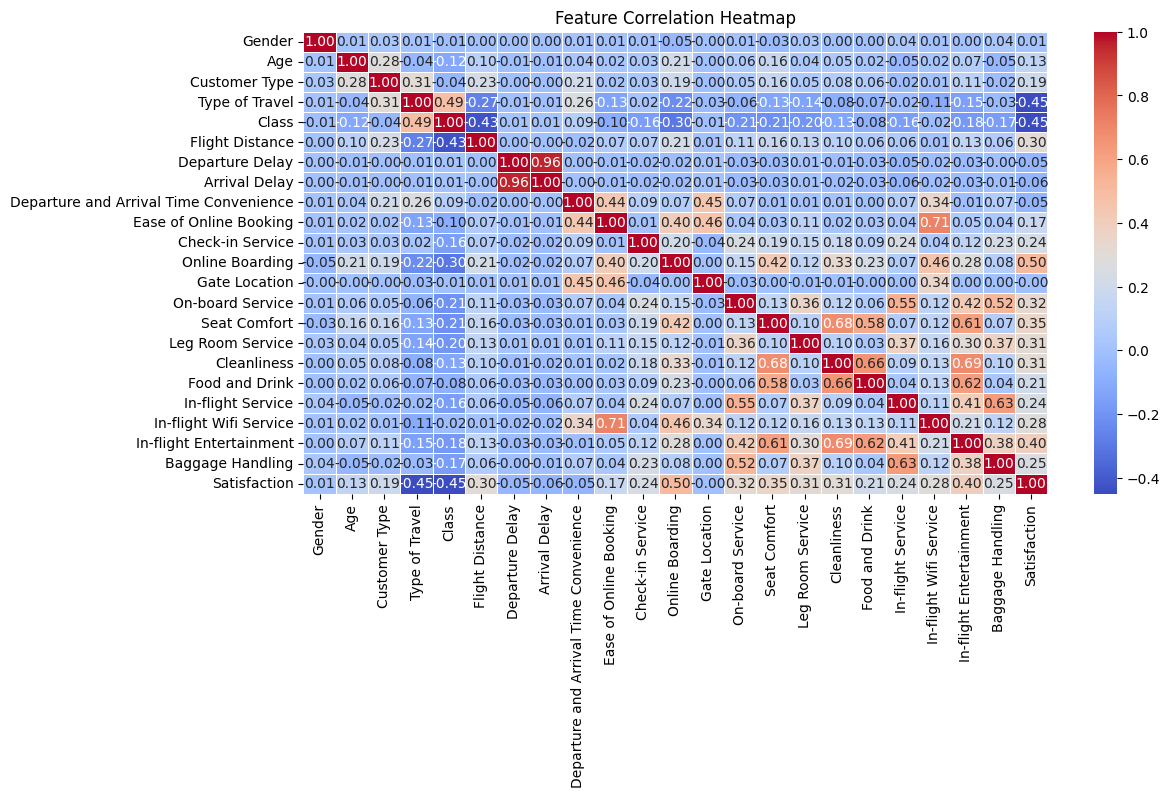

In [81]:
# Before the heatmap code:
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Then generate the heatmap with:
plt.figure(figsize=(12, 6))
sns.heatmap(df_encoded[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [82]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-0.297587,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.256300,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.297587,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.256300,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,-0.297587,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918


## Feature Engineering

In [83]:
df_encoded["Long Delay"] = (df_encoded["Arrival Delay"] > 30).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,1.181428,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,0.423441,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,1.181428,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.181428,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.423441,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0


In [84]:
df_encoded["Loyal Business Traveler"] = ((df_encoded["Customer Type"] == 0) & (df_encoded["Type of Travel"] == 0)).astype(int)
df_encoded.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Long Delay,Loyal Business Traveler
0,1.014878,0.566960,-2.112281,-0.669366,-0.955724,-0.370261,-0.333948,-0.261490,-0.037727,0.173445,...,-1.026310,1.304487,1.349867,1.153946,0.204090,1.230787,1.159206,-0.876487,0,0
1,-0.985340,-0.292868,0.473422,-0.669366,-0.955724,-0.370261,0.296454,0.623553,-0.692719,-0.539957,...,1.252898,1.304487,-0.153973,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
2,1.014878,0.103976,0.473422,-0.669366,-0.955724,-0.338179,-0.386481,-0.391644,0.617265,0.886847,...,-0.266574,1.304487,1.349867,-0.545774,0.956346,-0.268414,-0.535681,1.140918,0,0
3,1.014878,0.699242,0.473422,-0.669366,-0.955724,0.716512,-0.386481,-0.391644,-0.692719,-0.539957,...,1.252898,0.543264,0.597947,1.153946,-0.548166,1.230787,1.159206,1.140918,0,0
4,-0.985340,0.633101,0.473422,-0.669366,-0.955724,2.285515,-0.386481,-0.365613,-0.037727,0.173445,...,0.493162,1.304487,0.597947,-0.545774,0.204090,-0.268414,-0.535681,1.140918,0,0


In [85]:
df_original.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<ipython-input-89-32d83d55fb5f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


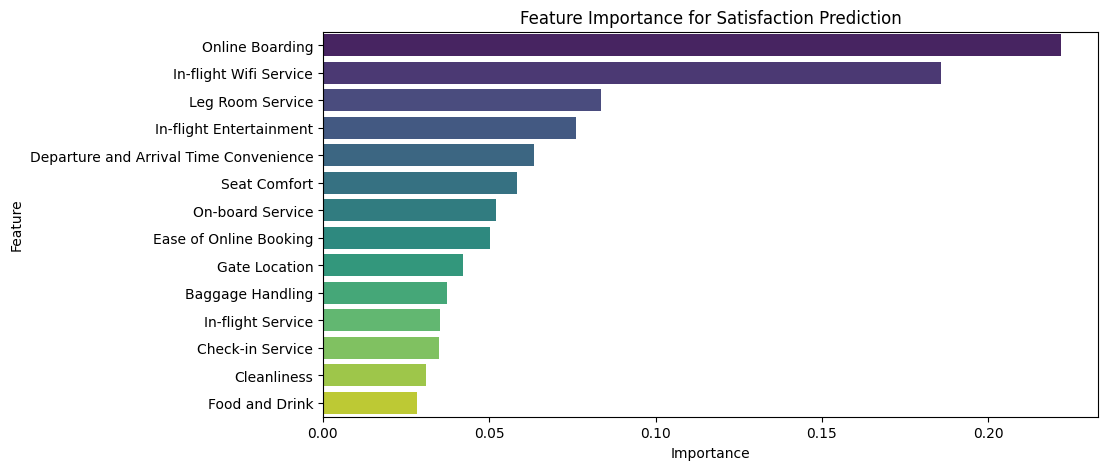

                                   Feature  Importance  Normalized Weight
5                          Online Boarding    0.221870           0.221870
0                   In-flight Wifi Service    0.185810           0.185810
9                         Leg Room Service    0.083620           0.083620
7                  In-flight Entertainment    0.076178           0.076178
1   Departure and Arrival Time Convenience    0.063575           0.063575
6                             Seat Comfort    0.058215           0.058215
8                         On-board Service    0.051945           0.051945
2                   Ease of Online Booking    0.050277           0.050277
3                            Gate Location    0.041966           0.041966
10                        Baggage Handling    0.037332           0.037332
12                       In-flight Service    0.035190           0.035190
11                        Check-in Service    0.034806           0.034806
13                             Cleanli

In [89]:
# Select features and target
rating_features = ["In-flight Wifi Service", "Departure and Arrival Time Convenience", "Ease of Online Booking",
                   "Gate Location", "Food and Drink", "Online Boarding", "Seat Comfort", "In-flight Entertainment",
                   "On-board Service", "Leg Room Service", "Baggage Handling", "Check-in Service",
                   "In-flight Service", "Cleanliness"]

rating_features = [col.strip() for col in rating_features]  #Remove any leading/trailing spaces to ensure name consistency

X = df_original[rating_features]
y = df_original["Satisfaction"]  # Target variable

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({"Feature": rating_features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.title("Feature Importance for Satisfaction Prediction")
plt.show()

# Normalize weights to sum to 1
importance_df["Normalized Weight"] = importance_df["Importance"] / importance_df["Importance"].sum()

# Print final feature weights
print(importance_df)

# Compute weighted satisfaction score
df_encoded["Weighted Satisfaction Score"] = sum(df_encoded[feature] * weight for feature, weight in zip(importance_df["Feature"], importance_df["Normalized Weight"]))


<Axes: xlabel='Satisfaction', ylabel='Arrival Delay'>

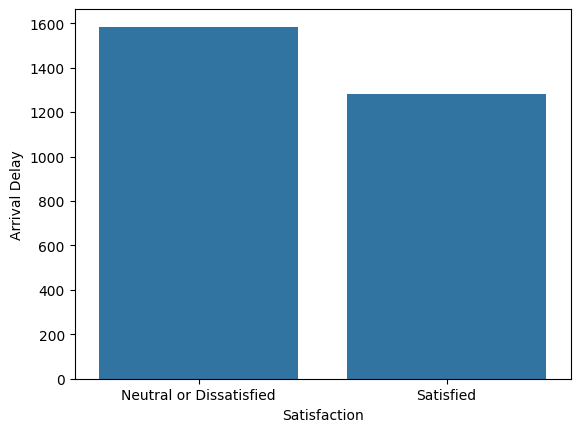

In [ ]:
# (my code)

grouped_satis_a = df.groupby(['Satisfaction'])['Arrival Delay'].max()
sns.barplot(grouped_satis_a)

## Machine Learning

### Unsupervised

### Supervised